# A program to request and process USDA national-level corn data from the API server. 

In [1]:
import requests
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.rcParams.update({'font.size': 24})

import seaborn as sns
sns.set()

In [6]:
def tidy(df):
    del df["CV (%)"]
    del df["agg_level_desc"]
    del df["asd_desc"]
    del df["begin_code"]
    del df["class_desc"]
    del df["commodity_desc"]
    del df["congr_district_code"]
    del df["country_code"]
    del df["country_name"]
    del df["domain_desc"]
    del df["domaincat_desc"]
    del df["end_code"]
    del df["freq_desc"]
    del df["group_desc"]
    del df["load_time"]
    del df["location_desc"]
    del df["prodn_practice_desc"]
    del df["reference_period_desc"]
    del df["region_desc"]
    del df["sector_desc"]
    del df["short_desc"]
    del df["source_desc"]
    del df["statisticcat_desc"]
    del df["unit_desc"]
    del df["util_practice_desc"]
    del df["watershed_code"]
    del df["watershed_desc"]
    del df["week_ending"]
    del df["zip_5"]
    del df["county_ansi"]
    del df["state_ansi"]
    del df["asd_code"]
    del df["county_code"]
    del df["county_name"]
    
    return df

In [8]:
def get_corn():
    print("Now grabbing... ")
    dat = requests.get("http://quickstats.nass.usda.gov/api/api_GET/?key=210BA222-FC6E-3FB2-B4D7-DA2DAA1CC829&source_desc=SURVEY&sector_desc=CROPS&group_desc=FIELD CROPS&commodity_desc=CORN&statisticcat_desc=YIELD&util_practice_desc=GRAIN&unit_desc=BU / ACRE&agg_level_desc=NATIONAL&prodn_practice_desc=ALL PRODUCTION PRACTICES&reference_period_desc=YEAR&year__GE=1950")
    if dat.status_code == 200:
        print("Data grabbed from USDA successfully...")
        dat = dat.json()
        dat = pd.DataFrame(dat["data"])
        print("Filled!")
    else:
        print("Data grabbed from USDA unsuccessfully. Error code " + str(dat.status_code) + ". Skipping.")
    return tidy(dat)

In [17]:
# Get data
usda_national = get_corn()

Now grabbing... 
Data grabbed from USDA successfully...
Filled!


In [19]:
# Add log
usda_national["Value"] = usda_national["Value"].astype(float)
usda_national["log_Value"] = np.log(usda_national["Value"])

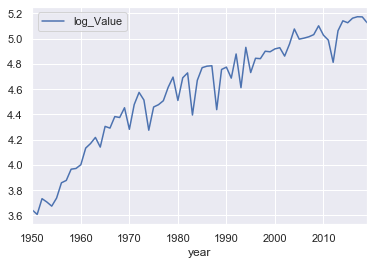

In [21]:
usda_national.plot(x = "year", y = "log_Value")

In [23]:
usda_national.head()

,Value,state_alpha,state_fips_code,state_name,year,log_Value
0,168.4,US,99,US TOTAL,2019,5.126342
1,176.4,US,99,US TOTAL,2018,5.172754
2,176.6,US,99,US TOTAL,2017,5.173887
3,174.6,US,99,US TOTAL,2016,5.162498
4,168.4,US,99,US TOTAL,2015,5.126342


In [24]:
usda_national.to_csv("./output/USDA_national_yields.csv", index = False)